In [74]:
# Convert Logs to a dataframe

import os
import json
import pandas as pd
import seaborn as sns

suffixes = ['B', 'KB', 'MB', 'GB', 'TB', 'PB']


def humansize(nbytes):
    i = 0
    while nbytes >= 1024 and i < len(suffixes)-1:
        nbytes /= 1024.
        i += 1
    f = ('%.2f' % nbytes).rstrip('0').rstrip('.')
    return '%s %s' % (f, suffixes[i])


path = "./logs/"
dir_list = os.listdir(path)

logs = []

for file in dir_list:
    with open("./logs/" + file, 'r') as f:
        for line in f.readlines():
            jsonData = json.loads(line)
            if jsonData["level"] == "info" and jsonData["message"] == "FINISH":
                logs.append(jsonData)

df = pd.DataFrame(logs)

df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%dT%H:%M:%S")
# df["BYTES"] = df["BYTES"].apply(humansize)


<AxesSubplot:xlabel='time'>

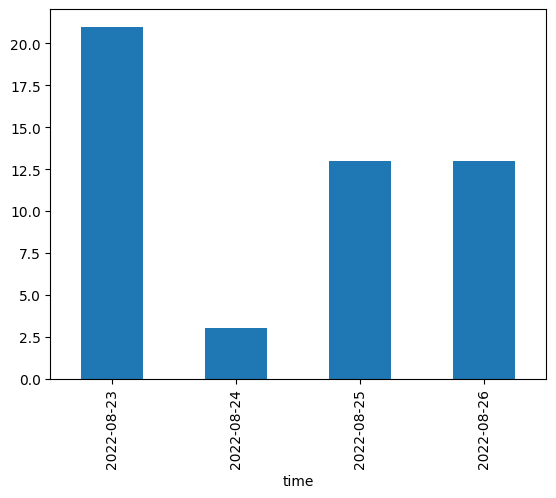

In [104]:
# Connections per day

# plot = sns.histplot(data=df, x=df["time"].dt.date)

# x_labels = df["time"].dt.strftime("%Y-%m-%d").sort_values().unique()

# plot.set_xticklabels(labels=x_labels,rotation=90)

df["time"].groupby(df["time"].dt.date).count().plot(kind="bar")

<AxesSubplot:xlabel='time', ylabel='BYTES'>

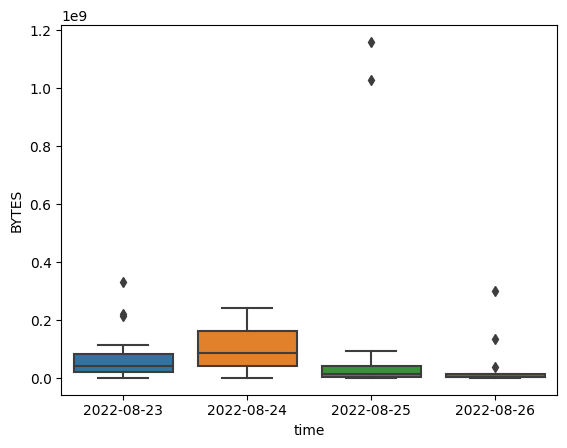

In [89]:
sns.boxplot(x=df["time"].dt.date, y=df["BYTES"] )